In [107]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import os 
import re
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

%matplotlib inline

Result DF's


In [108]:

result_csv_list = os.listdir(os.getcwd()+'\\2018-2021')
result_csv_list.sort(reverse=True)
dfs = []
for file in result_csv_list:
    if 'survey_results_public' in file :
        dfs.append(pd.read_csv(os.getcwd()+'\\2018-2021'+'\\'+file,low_memory=False))

result2021,result2020,result2019,result2018 = dfs

In [109]:
result_df = [result2021,result2020,result2019,result2018]
dfcol_list = [list(x.columns) for x in result_df]

for item in dfcol_list:
    item.sort(reverse=True)

col_df = pd.DataFrame(dfcol_list).transpose()
col_df.columns=['2021','2020','2019','2018']


In [110]:
def replace2021(x):
    if x==None:
        return np.nan
    if 'HaveWorkedWith' in x:
        return x.replace('HaveWorkedWith','WorkedWith')
    if 'WantToWorkWith' in x:
        return x.replace('WantToWorkWith','DesireNextYear')
    if x == 'ResponseId':
        return 'Respondent'
    if x=='ConvertedCompYearly':
        return 'SalaryUSD'
    return x

def replace2020(x):
    if x==None:
        return np.nan
    if x=='ConvertedComp':
        return 'SalaryUSD'
    return x

def replace2020_2019(x):
    if x==None:
        return np.nan
    if x=='ConvertedComp':
        return 'SalaryUSD'
    if x=='WebFrameDesireNextYear':
        return 'WebframeDesireNextYear'
    if x=='WebFrameWorkedWith':
        return 'WebframeWorkedWith'
    return x

def replace2018(x):
    if x == None:
        return np.NaN
    if x=='FrameworkWorkedWith':
        return 'WebframeWorkedWith'
    if x=='FrameworkDesireNextYear':
        return 'WebframeDesireNextYear'
    if x=='ConvertedSalary':
        return 'SalaryUSD'
    return x

col_df['2021_replace'] = col_df['2021'].apply(replace2021)
col_df['2020_replace'] = col_df['2020'].apply(replace2020_2019)
col_df['2019_replace'] = col_df['2019'].apply(replace2020_2019)
col_df['2018_replace'] = col_df['2018'].apply(replace2018)

In [111]:
year = 2021
for x in [result2021,result2020,result2019,result2018]:
    maincol=f'{year}'
    replacecol=f'{year}_replace'
    x.rename(columns=dict(zip(col_df[maincol],col_df[replacecol])),inplace=True)
    x['Year'] = year
    year =year-1

In [112]:
new_col = [list(x.columns) for x in result_df]
com_col = list(set.intersection(*map(set,new_col)))

In [113]:
datadf = pd.concat([result2021[com_col],result2020[com_col],result2019[com_col],result2018[com_col]]
        ,ignore_index=True)

LanguageWorkedwith Analysis

In [114]:
datadf['LanguageWorkedWith'].replace(np.NaN,'',inplace=True)
langknow = ['HTML/CSS', 'JavaScript', 'PHP', 'Ruby', 'SQL', 'TypeScript','Python', 'R', 'VBA','Objective-C','C#' ]

for lan in langknow:
    datadf[lan] = datadf['LanguageWorkedWith'].str.split(';').apply(lambda x: True if lan in x else False)


In [115]:
lag_agg = {x:'sum' for x in langknow}
lag_agg['LanguageWorkedWith'] = 'count'
langworkedwiith_df = datadf.groupby('Year').agg(lag_agg)


In [132]:
langworkedwiith_df.loc[langworkedwiith_df['HTML/CSS']==0,'HTML/CSS'] = langworkedwiith_df['HTML/CSS'].median()
langworkedwiith_df = langworkedwiith_df.div(langworkedwiith_df['LanguageWorkedWith']/100,axis=0)
langworkedwiith_df.drop('LanguageWorkedWith',axis=1,inplace=True)

Text(0, 0.5, 'Languange')

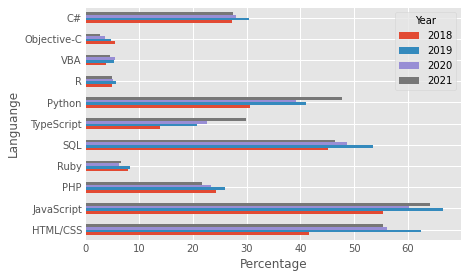

In [180]:
ax = langworkedwiith_df.transpose().plot(kind='barh')
ax.set_xlabel('Percentage')
ax.set_ylabel('Languange')